In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data/ten_intensities.csv')

Now lets load in the data and take a look

In [ ]:
# Take a look at the first few rows of the data
print(data.head())

# Get the shape of the data
print(data.shape)

# Get the column names
print(data.columns)

# Get the data types of each column
print(data.dtypes)

# Calculate summary statistics for the data
print(data.describe())

In [ ]:
# Plot a histogram of the SpikeTime column
plt.hist(data['SpikeTime'], bins=50)
plt.xlabel('Spike Time')
plt.ylabel('Frequency')
plt.title('Histogram of Spike Times')
plt.show()


In [ ]:
# Plot a bar chart of the number of trials for each intensity level
intensity_counts = data['Intensity'].value_counts()
plt.bar(intensity_counts.index, intensity_counts.values)
plt.xlabel('Intensity Level')
plt.ylabel('Number of Trials')
plt.title('Number of Trials for Each Intensity Level')
plt.show()

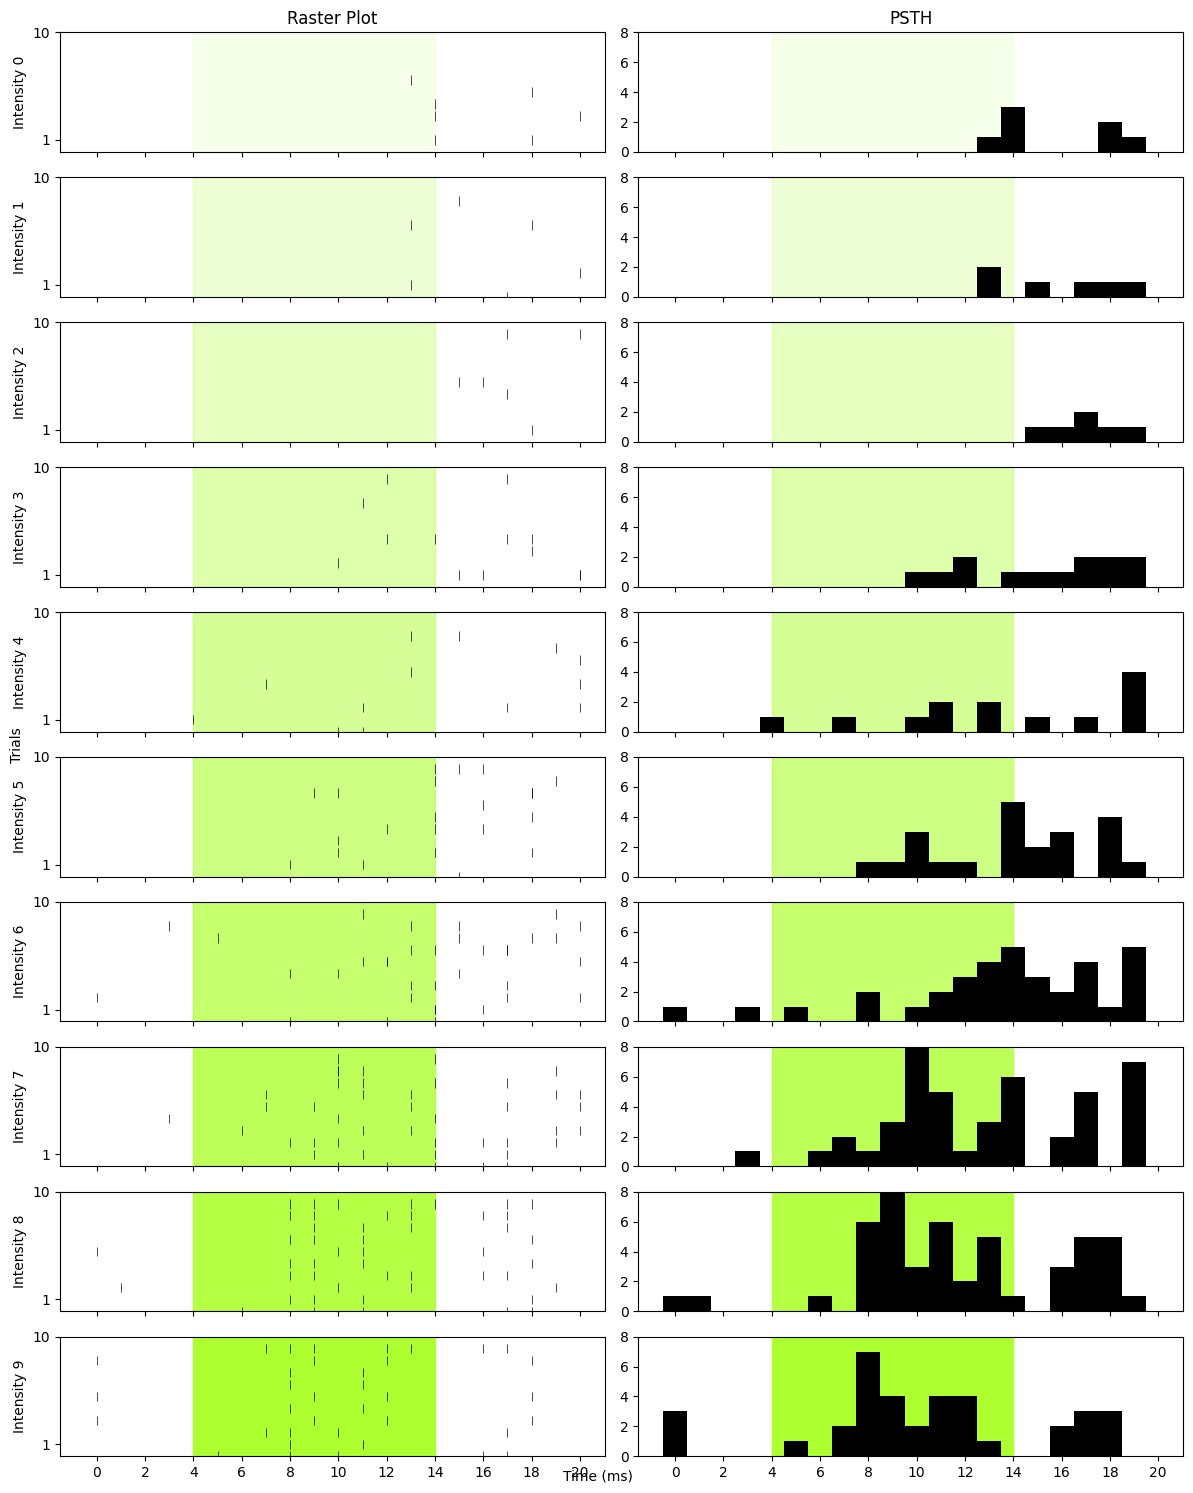

In [7]:
# Define constants
stim_on = 4
stim_off = 14
num_tp = 21
trials = sorted(data['Trial'].unique())

# Create a list of intensity levels and sort them
int_levels = sorted(data['Intensity'].unique())

# Set the number of subplot rows based on number of intensity levels in data
# Also specify the figure dimensions since it will need to be a big figure
fig, axs = plt.subplots(len(int_levels), 2, figsize=[12, 15], sharex=True)

# Initialize y_max to scale the PSTHs
y_max = 0

for i, intensity in enumerate(int_levels):
    
    ## Raster plot
    # select just data for current intensity level
    dat = data[data['Intensity'] == intensity]

    # Draw the raster one trial at a time
    for trial in trials:
        # get spike times for this trial
        spike_times = dat[dat['Trial'] == trial]['SpikeTime']
        # Draw the raster
        axs[i, 0].vlines(spike_times, 
                         trial - 0.4, trial + 0.4, 
                         color='black', linewidth=0.5)

    # Shade time when stimulus was on
    axs[i, 0].axvspan(stim_on, stim_off, 
                      alpha= intensity / 10 + 0.1, 
                      color='greenyellow')

    # Set y-axis limits and ticks for raster plot
    axs[i, 0].set_ylim(0, len(trials))
    axs[i, 0].set_yticks([1, len(trials)])
    axs[i, 0].set_ylabel(f'Intensity {intensity}')

    ## PSTH
    # Shade time when stimulus was on
    axs[i, 1].axvspan(stim_on, stim_off, 
                      alpha= intensity / 10 + 0.1, 
                      color='greenyellow')
    
    # Plot histogram
    hist, bins = np.histogram(dat['SpikeTime'], bins=range(0, num_tp, 1))
    axs[i, 1].bar(bins[:-1], hist, width=1, color='black')

    # Update y_max
    y_max = max(y_max, np.max(hist))

    # Set x-axis ticks for PSTH
    axs[i, 1].set_xticks(range(0, num_tp, 2))
    axs[i, 1].set_xlabel('')

# Set y-axis limits for all PSTHs
for i in range(len(int_levels)):
    axs[i, 1].set_ylim(0, y_max)

# Set titles and labels
axs[0, 0].set_title('Raster Plot')
axs[0, 1].set_title('PSTH')
fig.text(0.5, 0.01, 'Time (ms)', ha='center')
fig.text(0.01, 0.5, 'Trials', va='center', rotation='vertical')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()

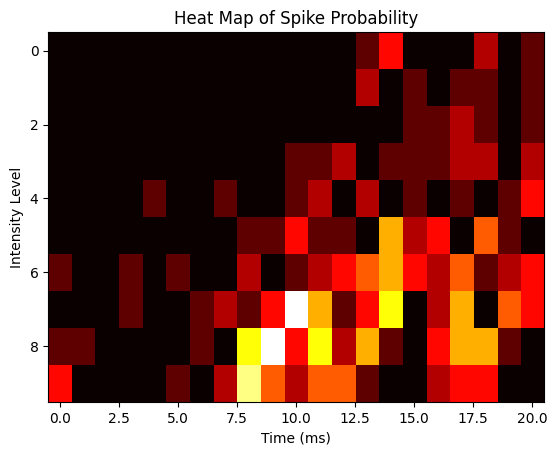

In [8]:
# Define experimental parameters
stim_on = 4   # time stimulus turned on
stim_off = 14 # time stimulus turned off
num_trials = 10 # number of trials per intensity level
num_tp = 21     # Number of time points in each trial (0-20 ms, inclusive)
num_intensities = 10 # number of stimulus intensities

# Initialize 2D array to store histograms
histograms = np.zeros((num_intensities, num_tp))

# Loop through each intensity level and compute histogram
for i, intensity in enumerate(sorted(data['Intensity'].unique())):
    hist, _ = np.histogram(data[data['Intensity'] == intensity]['SpikeTime'],
                           bins=num_tp,
                           range=(0, num_tp))
    histograms[i, :] = hist

# Create heat map
plt.imshow(histograms, cmap='hot', interpolation='nearest', aspect='auto')
plt.xlabel('Time (ms)')
plt.ylabel('Intensity Level')
plt.title('Heat Map of Spike Probability')
plt.show()